# Maschinelles Lernen versus Herleitung

Es stellt sich die Frage, wann es besser ist, Daten mittels Maschinellem Lernen oder einer Herleitung zu bearbeiten.

Dazu wird ein einfaches Beispiel betrachtet. Daten, die eine lineare Abhängigkeit mit einer normalverteilten Unsicherheit haben. 
Es wird auf verschiedene Arten versucht, aus den Datenpunkten ein optimales Ergebnis für die beiden Parameter $m$ (*slope*)
und $b$ (*interceopt*) zu finden.

### Laden der benötigten Module

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Definition der Daten.

Die Daten genügen der Gleichung $y = m * x + b + \mathcal{N}(0,u)$.
Hierbei ist $m$ die Steigung (\emph{slope}) der Geraden, $b$ der $y$-Achsenabschnitt (*intercept*).
Darüber hinaus ist $\mathcal{N}(0,u)$ eine normalverteilte Unsicherheit um den Erwartungswert $0$ mit der Standardabweichung $u$ (*uncertainty*).

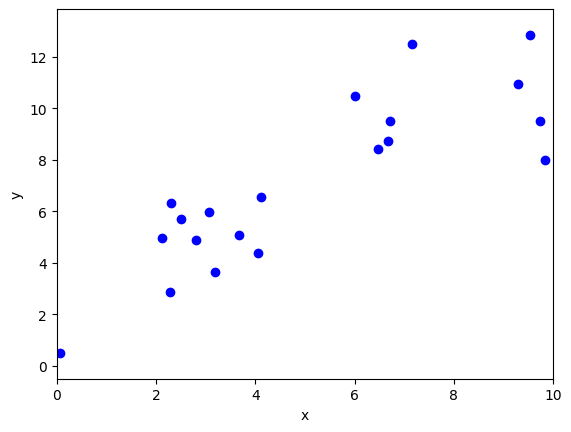

In [2]:
# --- define parameters of the data
slope = 1.0          # Steigug der Geraden
intercept = 2.0      # y-Achsenabschnitt
uncertainty = 2.0    # Unsicherheit
n_points = 20        # Anzahl der generieten Datenpunkte
x_min = 0.0          # minimalster x-Wert der Datenpunkte
x_max = 10.0         # maximaler x-Wert der Datenpunkte

# --- generate data points
np.random.seed (1712)
x_data = np.random.uniform (x_min, x_max, n_points)
y_data = slope * x_data + intercept + np.random.normal (0.0, uncertainty, n_points)

# --- plot the generated data points
plt.plot (x_data, y_data, 'bo')
plt.xlim (x_min, x_max)
plt.xlabel ("x")
y_min = np.min (y_data) - 1.0 
y_max = np.max (y_data) + 1.0 
plt.ylim (y_min, y_max)
plt.ylabel ("y")
plt.show ()

## Gittersuche

An Hand der grafischen Darstellung der Punkte kann grob eine Linie eingezeichnet werden, welche die Beziehung zwischen 
der $x$-Werten und den $y$-Werten darstellt.
Da in diesem Beispiel die echten Werte für die beiden Parameter $m$ und $b$ bekannt sind, wird ein zwei-dimensionales Gitter
aufgebaut. Die Werte für $m$ und $b$ werden hier um einen Werte nach oben beziehungsweise unten variiert. 
Für jede Seite des Gitters werden eine vorgegebene ANzahl für Gitterteilen bestimmt.

Für jeden Gitterpunkt, also einem Wertepaar für $(m, b)$, wird der Fehler berechnet. Dazu ist zu klären, 
wie der Fehler berechnet wird. Die optimale Lösung im Gitter soll der minimale Wert des Fehlers haben.
ALs Fehler für einen Datenpunkt wird die quadrierte Abweichung zwischen den Wert nach dem linearen Modell und dem tatsächlichen Wert.

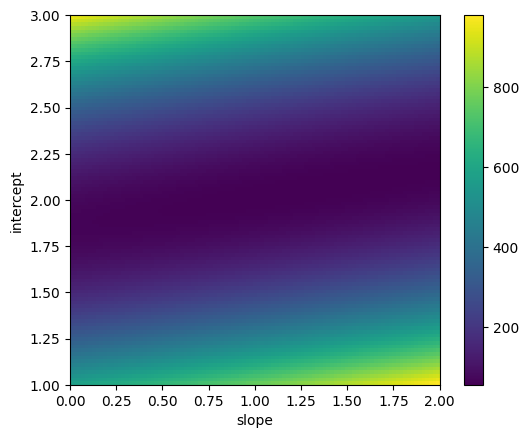

(47, 66)
  slope :  0.94, intercept :  2.32, squ.error : 55.64


In [3]:
# --- define the grid for the calculation
n_int = 101     # number of parts per side
diff = 1.0      # difference of the known values
slopes = np.linspace (slope - diff, slope + diff, n_int)
intercepts = np.linspace (intercept - diff, intercept + diff, n_int)

# --- define the linear model
def linear_model (x, m, b):
    return m * x + b

# --- define the calculation of the error
def square_error (m, b, x, y):
    y_hat = linear_model (x, m, b) 
    return np.sum (( y_hat - y) **2)

# --- calculate the error for all points in the grid
square_errors = np.array ([[square_error (m, b, x_data, y_data) 
                            for b in intercepts] 
                            for m in slopes])

# --- plot the calculates errors 
plt.imshow (square_errors, extent = [np.min (slopes), np.max (slopes), np.min (intercepts), np.max (intercepts)])
plt.xlabel ("slope")
plt.ylabel ("intercept")
plt.colorbar ()
plt.show ()

# --- determine the eoptimal point in the grid
indices = np.unravel_index (square_errors.argmin (), square_errors.shape)
print (indices)
best_slope, best_intercept = slopes [indices [0]], intercepts [indices [1]]
squared_error = square_error (best_slope, best_intercept, x_data, y_data)
print (f"  slope : {best_slope:5.2f}, intercept : {best_intercept:5.2f}, squ.error : {squared_error:5.2f}")


Damit ist mit der Grid-Suche ein Optimum gefunden worden. 
Diese gefundene Linie wird zusammen mit der Original-Linie und den Datenpunkten geplottet

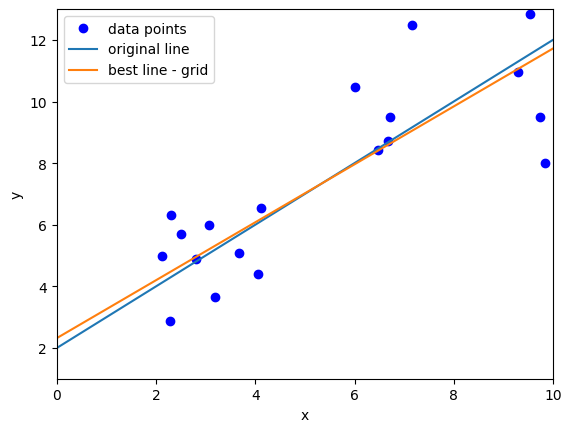

In [4]:
plt.plot (x_data, y_data, 'bo', label = "data points")
plt.xlim (x_min, x_max)
plt.xlabel ("x")
y_min = slope * x_min + intercept - 1.0
y_max = slope * x_max + intercept + 1.0
plt.ylim (y_min, y_max)
plt.ylabel ("y")

x_line = np.linspace (x_min, x_max, 100)
plt.plot (x_line, linear_model (x_line, slope, intercept), label = "original line")
plt.plot (x_line, linear_model (x_line, best_slope, best_intercept), label = "best line - grid")
plt.legend ()
plt.show ()

Wie zu erkennen ist, weichen die beiden Linien nicht so sehr voneinander ab!

## Lineare Regression

Das finden der optimalen Ausgleichsgerade wird durch eine Lineare Regression durchgeführt.
Dabei wird die Summe der quadratischen Fehler, wie es oben beschrieben wurde,
minimiert.
  

In [5]:
# --- define the Lineare Regression-method
def LinReg (x, y):
    n = x.size
    sum_x = np.sum (x)
    sum_y = np.sum (y)
    sum_x2 = np.sum (x * x)
    sum_xy = np.sum (x * y)
    sum_y2 = np.sum (y * y)
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x **2)
    b = (sum_x2 * sum_y - sum_x * sum_xy) / (n * sum_x2 - sum_x **2)
    r = (n * sum_xy - sum_x * sum_y) / (np.sqrt (n *sum_x2 - sum_x **2) * np.sqrt (n * sum_y2 - sum_y **2))
    r2 = r * r
    return m, b, r2

# --- calculate the value with the Lineare Rgression-mathod
slope_LR, intercept_LR, corr_coeff_LR = LinReg (x_data, y_data)
squared_error_LR = square_error (slope_LR, intercept_LR, x_data, y_data)
print (f"Grid search          slope : {best_slope:7.4f}, intercept : {best_intercept:7.4f}, squ.error : {squared_error:7.4f}")
print (f"Linear Regression    slope : {slope_LR:7.4f}, intercept : {intercept_LR:7.4f}, squ.error : {squared_error_LR:7.4f}, correlation coefficient : {corr_coeff_LR:7.4f}")

Grid search          slope :  0.9400, intercept :  2.3200, squ.error : 55.6415
Linear Regression    slope :  0.9391, intercept :  2.3197, squ.error : 55.6409, correlation coefficient :  0.7262


Bei der Gittersuche wurden nur die diskreten Gitterpunkte betrachtet.
Bei der Linearen Regression werden die Werte direkt berechnet.
Die Werte aus der Linearen Regression unterscheiden sich nur wenig von den Werten der Gittersuche.
Der Fehler ist minimal besser. Ein Unterschied zwischen der besten Linie nach der Grid Suche und der Linearen Regression ist kaum bis überhaupt nicht zu sehen.

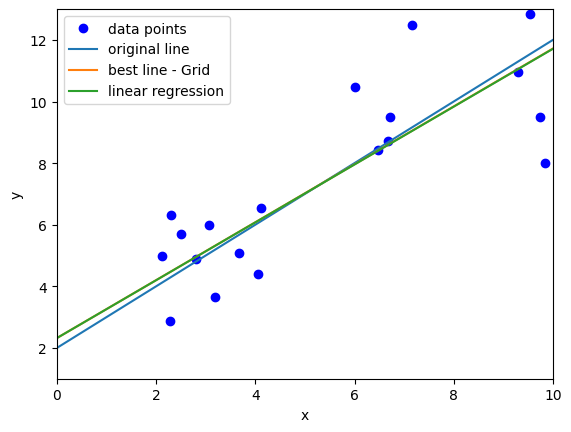

In [6]:
plt.plot (x_data, y_data, 'bo', label = "data points")
plt.xlim (x_min, x_max)
plt.xlabel ("x")
y_min = slope * x_min + intercept - 1.0
y_max = slope * x_max + intercept + 1.0
plt.ylim (y_min, y_max)
plt.ylabel ("y")

x_line = np.linspace (x_min, x_max, 100)
plt.plot (x_line, linear_model (x_line, slope, intercept), label = "original line")
plt.plot (x_line, linear_model (x_line, best_slope, best_intercept), label = "best line - Grid")
plt.plot (x_line, linear_model (x_line, slope_LR, intercept_LR), label = "linear regression")
plt.legend ()
plt.show ()

Die Lineare Regression ist eine wichtige Mathode. Dort ist sie in sklearn implementiert.

In [7]:
# --- import 
from sklearn.linear_model import LinearRegression
# --- define the model
model = LinearRegression ()
xreshape = x_data.reshape (-1,1)
# You should call .reshape() on x because this array must be two-dimensional, or more precisely, 
# it must have one column and as many rows as necessary. 
# That’s exactly what the argument (-1, 1) of .reshape() specifies.
# https://realpython.com/linear-regression-in-python/
# --- firt the model
model.fit (xreshape, y_data)
corr_coeff_sklearn = model.score (xreshape, y_data) # R^2 !!!
intercept_sklearn = model.intercept_
slope_sklearn = model.coef_ [0]
# --- print the results
squared_error_sklearn = square_error (slope_sklearn, intercept_sklearn, x_data, y_data)
print (f"Grid search          slope : {best_slope:7.4f}, intercept : {best_intercept:7.4f}, squ.error : {squared_error:7.4f}")
print (f"Linear Regression    slope : {slope_LR:7.4f}, intercept : {intercept_LR:7.4f}, squ.error : {squared_error_LR:7.4f}, correlation coefficient : {corr_coeff_LR:7.4f}")
print (f"sklearn              slope : {slope_sklearn:7.4f}, intercept : {intercept_sklearn:7.4f}, squ.error : {squared_error_sklearn:7.4f}, correlation coefficient : {corr_coeff_sklearn:7.4f}")

Grid search          slope :  0.9400, intercept :  2.3200, squ.error : 55.6415
Linear Regression    slope :  0.9391, intercept :  2.3197, squ.error : 55.6409, correlation coefficient :  0.7262
sklearn              slope :  0.9391, intercept :  2.3197, squ.error : 55.6409, correlation coefficient :  0.7262


Bei sklearn kommt das selbe Resultat heraus wie bei der manuellen Bearbeitung der Linearen Regression.
Daher wird die Lineare Regression mittels sklearn bearbeitet.

## Erstes ML-Verfahren

Die Daten werden nun in eine Trainings- und Testmenge aufgeteilt. Dabei werden 70% der Daten als Trainingsdaten verwendet.
Anschließend wird anhand der Testdaten überprüft, wie gut die Daten vorhergesagt werden.
ALS ML-Verfahren mit die Lineare Regression verwendet.

LR model           slope :  0.8146, intercept :  2.3197, correlation coefficient :  0.6931
 x         y         y pred.
--------  --------  --------
 6.46400   8.42578   8.11684
 3.06600   5.97757   5.34894
 0.05369   0.50949   2.89520
 6.67782   8.73177   8.29101
 7.16351  12.47514   8.68663
 3.66713   5.07259   5.83859


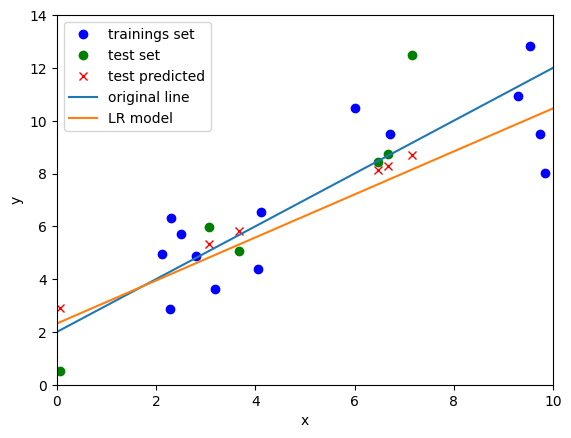

[ 0.30894169  0.62863665 -2.38571414  0.44075791  3.78850156 -0.76600831]
[ 0.09544497  0.39518404  5.69163198  0.19426753 14.35274408  0.58676874]
3.552673554920324
[6.46400041 3.06600396 0.05369426 6.67782322 7.16350596 3.6671282 ]
[8.1168393  5.34893641 2.89520202 8.29101276 8.6866349  5.83859363]
[ 9.59830699  6.20031054  3.18800084  9.8121298  10.29781254  6.80143478]
[-1.48146769 -0.85137413 -0.29279882 -1.52111704 -1.61117763 -0.96284114]


In [16]:
# --- import 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# --- splitt in training- / test-set
np.random.seed (1712)
test_size = 0.3   # 30%
X_train, X_test, y_train, y_test = train_test_split (x_data, y_data, test_size = 0.3)

# --- apply LR (Linear Regression)
linregmodel = LinearRegression ()
linregmodel_fit = linregmodel.fit (X_train.reshape(-1, 1), y_train)

# --- display the generated line
corr_coeff_LR = linregmodel.score (X_train.reshape(-1, 1), y_train) # R^2 !!!
intercept_KR = linregmodel.intercept_
slope_LR = linregmodel.coef_ [0]
print (f"LR model           slope : {slope_LR:7.4f}, intercept : {intercept_LR:7.4f}, correlation coefficient : {corr_coeff_LR:7.4f}")

# --- predict the test data
y_pred_linreg = linregmodel_fit.predict (X_test.reshape(-1, 1))

print (" x         y         y pred.")
print ("--------  --------  --------")
for ind in range (X_test.size):
    print (f"{X_test [ind]:8.5f}  {y_test [ind]:8.5f}  {y_pred_linreg [ind]:8.5f}")

# --- plot the training  and test data
plt.plot (X_train, y_train, 'bo', label = "trainings set")
plt.plot (X_test, y_test, 'go', label = "test set")
plt.plot (X_test, y_pred_linreg, 'rx', label = "test predicted")

# Wieso liegen die nicht auf der Linie
# Wieso wird ein Punkt nicht angezeigt?

plt.xlim (x_min, x_max)
plt.xlabel ("x")
y_min = slope * x_min + intercept - 2.0
y_max = slope * x_max + intercept + 2.0
plt.ylim (y_min, y_max)
# --- auch abhängig von den Werten
plt.ylabel ("y")

x_line = np.linspace (x_min, x_max, 100)
plt.plot (x_line, linear_model (x_line, slope, intercept), label = "original line")
plt.plot (x_line, linear_model (x_line, slope_LR, intercept_LR), label = "LR model")
plt.legend ()
plt.show ()

# --- calculate the mean squarred error (MSE) 
print (y_test - y_pred_linreg)
print ((y_test - y_pred_linreg) ** 2)

mse_LR = np.mean ((y_test - y_pred_linreg)**2)
print (mse_LR)

# Wieso liegen die nicht auf der Linie
y_pruefen = slope_LR + X_test + intercept_LR
print (X_test)
print (y_pred_linreg)
print (y_pruefen)
print (y_pred_linreg - y_pruefen)


## Maschinelles Lernen oder Modelle berechnen (fitten)

Es stellt sich nun die Frage, was besser ist geeignet ist: die Analyse der Daten mit Hilfe von Methoden des Maschinellen Lernens
oder aber die Berechnung von Modellen.
Dazu schreibt Viviana Acquaviva [Acp23 - aber auch Acp19, etwas älterer Artikel von ihr] über Vor- und Nachteile der beiden
Verfahren

### Maschinelles lernenr
- datengetrieben, daher nur so gut wie die Daten
- Verallgemeinerung nur schwer möglich (das angewandte Modell kann nicht blindlings auf andere Daten angewendet werden)
- Interpretation ist möglich, aber nicht einfach
- schnell
- robust gegenüber fehlenden Daten
- ermöglicht glückliche Entdeckungen

### Modelle berechnen (fitten)
- getrieben durch Intuition oder Modell (nur so gut wie der Wissenschaftler)
- Verallgemeinerung (Anwendung auf weitere Daten) gut möglich, wenn die Physik gut verstanden ist
- Einfacher zu interpretieren
- rechenintensiv
- Umgang mit heterogenen Daten oftmals schwierig
- Führt zu Informationsverlust, wenn das Modell zu einfach ist

